In [0]:
#!unzip air-pollution-in-seoul.zip

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [4]:
# Retriving data for station code 101 for SO2
data_101=data[(data['Station code']==101) & (data['SO2']>0)]
print(len(data_101))
print(data_101.head(10))

25846
   Measurement date  Station code  ...  PM10  PM2.5
0  2017-01-01 00:00           101  ...  73.0   57.0
1  2017-01-01 01:00           101  ...  71.0   59.0
2  2017-01-01 02:00           101  ...  70.0   59.0
3  2017-01-01 03:00           101  ...  70.0   58.0
4  2017-01-01 04:00           101  ...  69.0   61.0
5  2017-01-01 05:00           101  ...  70.0   61.0
6  2017-01-01 06:00           101  ...  66.0   57.0
7  2017-01-01 07:00           101  ...  71.0   60.0
8  2017-01-01 08:00           101  ...  72.0   60.0
9  2017-01-01 09:00           101  ...  74.0   63.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


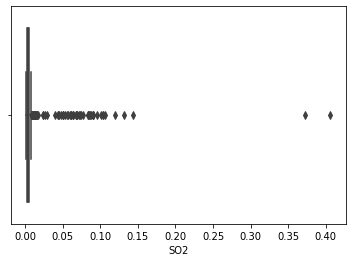

In [5]:
import seaborn as sns
sns.boxplot(data_101['SO2'])

25798


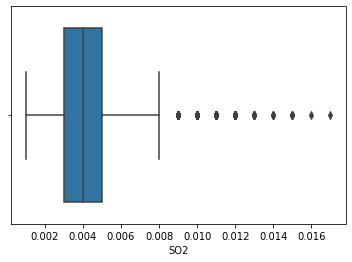

In [6]:
from scipy import stats
z = np.abs(stats.zscore(data_101['SO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_101_Rout = data_101[(z < 3)]
print(len(data_101_Rout))
sns.boxplot(data_101_Rout['SO2'])

In [7]:
df=data_101_Rout['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25798, 1)


In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.017]
25798
0.0 1.0


In [9]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25793 [0.1875, 0.1875, 0.1875, 0.1875, 0.125]


In [10]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25793, 5)


,x1,x2,x3,x4,y
0,0.1875,0.1875,0.1875,0.1875,0.1250
1,0.1875,0.1875,0.1875,0.1250,0.1250
2,0.1875,0.1875,0.1250,0.1250,0.1250
3,0.1875,0.1250,0.1250,0.1250,0.1250
4,0.1250,0.1250,0.1250,0.1250,0.1875
5,0.1250,0.1250,0.1250,0.1875,0.1250
6,0.1250,0.1250,0.1875,0.1250,0.1875
7,0.1250,0.1875,0.1250,0.1875,0.1875
8,0.1875,0.1250,0.1875,0.1875,0.1875
9,0.1250,0.1875,0.1875,0.1875,0.2500


In [11]:
print(matrix[:,4])

[[0.125]
 [0.125]
 [0.125]
 ...
 [0.125]
 [0.125]
 [0.125]]


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8512, 1) [[0.13020071]
 [0.20211123]
 [0.13020071]
 [0.23389142]
 [0.18478971]]


In [13]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8321020304271339
[0.01313321]
[[0.03629657 0.02681932 0.15091254 0.72251151]]


In [14]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.0015639078616923212
absolute mean error :  0.025103782202879055
0.83263787525407


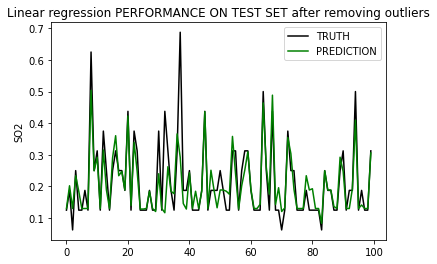

In [15]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('SO2')
plt.legend()
plt.show()

(25846, 1)
[0.001] [0.406]
25846
0.0 1.0
25841 [0.007407407407407408, 0.007407407407407408, 0.007407407407407408, 0.007407407407407408, 0.004938271604938271]
(8528, 1) [[0.00787974]
 [0.00719217]
 [0.00893239]
 [0.01150738]
 [0.00682709]]
mean squared eror :  0.00017888447347299785
absolute mean error :  0.0024709112847039636
0.021652914876135854


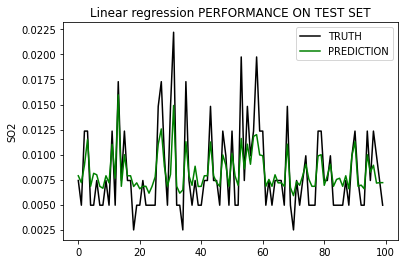

In [16]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_101['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [17]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0001788758206908665
absolute mean error :  0.002471872399410018
0.021700238291142426


In [18]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0002091948162554358
absolute mean error :  0.0016300674319108038
-0.14411907715077166


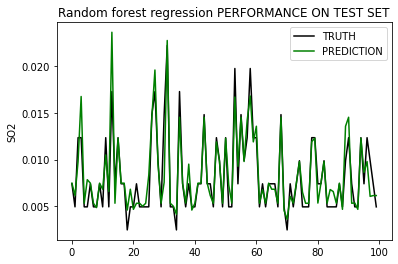

truth :  [[0.00740741]
 [0.00493827]
 [0.01234568]
 [0.01234568]
 [0.00493827]
 [0.00493827]
 [0.00740741]
 [0.00493827]
 [0.00493827]
 [0.00740741]]
prediction :  [0.00747732 0.00614857 0.0097921  0.01675565 0.00532383 0.00784603
 0.00747468 0.00532383 0.00486128 0.00747732]


In [19]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [20]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.00017791035688672515
0.002646404556765775
0.0269805104144627


In [21]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.00021009110070358068
absolute mean error :  0.0015915245855350896
-0.1490209965865954


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


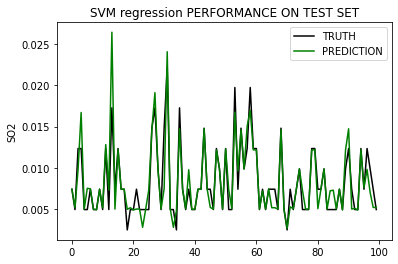

In [22]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [23]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Using TensorFlow backend.


Epoch 1/100
17313/17313 [==============================] - 1s 82us/step - loss: 1.0934e-04 - accuracy: 0.0103
Epoch 2/100
17313/17313 [==============================] - 1s 65us/step - loss: 2.0415e-04 - accuracy: 0.0103
Epoch 3/100
17313/17313 [==============================] - 1s 66us/step - loss: 1.8989e-04 - accuracy: 0.0103
Epoch 4/100
17313/17313 [==============================] - 1s 65us/step - loss: 1.8989e-04 - accuracy: 0.0103
Epoch 5/100
17313/17313 [==============================] - 1s 63us/step - loss: 1.8989e-04 - accuracy: 0.0103
Epoch 6/100
17313/17313 [==============================] - 1s 65us/step - loss: 1.8989e-04 - accuracy: 0.0103
Epoch 7/100
17313/17313 [==============================] - 1s 63us/step - loss: 1.8989e-04 - accuracy: 0.0103
Epoch 8/100
17313/17313 [==============================] - 1s 64us/step - loss: 1.8989e-04 - accuracy: 0.0103
Epoch 9/100
17313/17313 [==============================] - 1s 65us/step - loss: 1.8989e-04 - accuracy: 0.0103
Epoch 10/1

dict_keys(['loss', 'accuracy'])


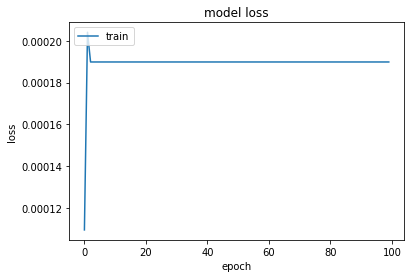

mean squared error :  0.0002552135207961767
mean absolute error :  0.0015915245855350896
-0.1490209965865954


In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


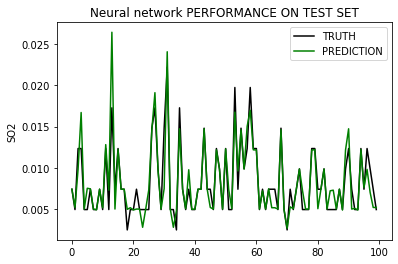

In [25]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [26]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.00493827 0.00493827 0.00493827 0.00493827]
 [0.01975309 0.01728395 0.01728395 0.01728395]
 [0.01728395 0.01234568 0.00740741 0.00740741]
 ...
 [0.00740741 0.00987654 0.18765432 0.02222222]
 [0.00740741 0.00740741 0.00740741 0.00987654]
 [0.00740741 0.00493827 0.00493827 0.00740741]]
(17313, 4)
(17313, 4, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17313/17313 [==============================] - 8s 442us/step - loss: 1.2372e-04
Epoch 2/100
17313/17313 [==============================] - 6s 362us/step - loss: 1.2238e-04
Epoch 3/100
17313/17313 [==============================] - 6s 361us/step - loss: 1.2027e-04
Epoch 4/100
17313/17313 [==============================] - 6s 365us/step - loss: 1.1443e-04
Epoch 5/100
17313/17313 [==============================] - 6s 367us/step - loss: 1.1234e-04
Epoch 6/100
17313/17313 [==============================] - 6s 361us/step - loss: 1.0974e-04
Epoch 7/100
17313/17313 [==============================] - 6s 367us/step - loss: 1.0688e-04
Epoch 8/100
17313/17313 [==============================] - 6s 364us/step - loss: 1.0857e-04
Epoch 9/100
17313/17313 [==============================] - 6s 360us/step - loss: 1.0503e-04
Epoch 10/100
17313/17313 [==============================] - 6s 362us/step - loss: 1.0338e-04
Epoch 11/100
17313/17313 [==============================] - 6s 368us/step - los

dict_keys(['loss'])


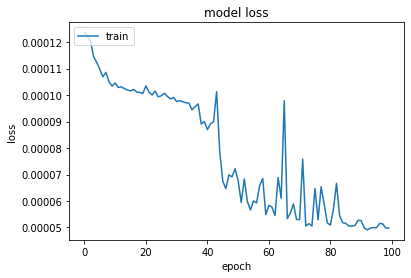

mean square error : 0.0001774075798584532
mean absolute error :  0.001940195751090084
0.0297302763976538


In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

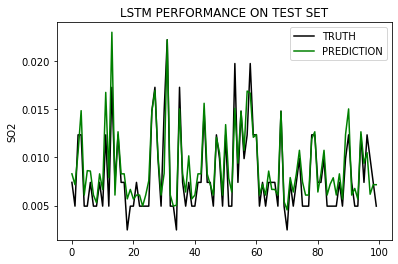

In [29]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')